# Predicting the Price of Toyota Vehicles

Dear Head of Data Science,

Thank you for trusting me to complete this important project.  I can tell that the loss of the sales teams' beloved top sales person was difficult.  It is my pleasure to assist the sales team with developing an automated process of better understanding how they can continue to achieve success with their quarterly goals.

Below you will find my analysis of the Toyota dataset that you sent me.  This analysis will contain the following steps:

1. Data validation: Describe validation and cleaning steps for every column in the data. Describe validation and cleaning steps for every column in the data.
2. Exploratory Analysis to answer the customer questions, including: Two different types of graphic showing single variables only, At least one graphic showing two or more variables. Description of the findings.
3. Model Development including: What type of problem this is, Fitting a baseline model, Fitting a comparison model.
4. Model evaluation: Show how the two models compare.
5. Definition of a metric for the business to monitor: How should the business monitor what they want to achieve? Estimate the initial value(s) for the metric based on the current data.
6. Final summary including recommendations that the business should undertake.

As you can already see, this is an involved analysis.  Please do not hesitate to reach out to me with questions if I have left anything unclear.

## Install packages

In [1]:
install.packages(c("tidyverse", "janitor", "naniar", "fastDummies"), quiet = TRUE)
library(tidyverse, quietly = TRUE)
library(janitor, quietly = TRUE)
library(naniar, quietly = TRUE)
library(fastDummies, quietly = TRUE)
library(broom, quietly = TRUE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Read in the Toyota dataset

In [2]:
toyota <- read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/toyota.csv")

Rows: 6738 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, transmission, fuelType
dbl (6): year, price, mileage, tax, mpg, engineSize

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Take a look at the data from a few different viewpoints:

At this point it is clear that the dataset consists of 9 features.  At first glance, we may have an issue with columns that are defined as characters but would be better served as factors to help with understanding the structure of the data.  

In [3]:
head(toyota)

tail(toyota)

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
GT86,2016,16000,Manual,24089,Petrol,265,36.2,2
GT86,2017,15995,Manual,18615,Petrol,145,36.2,2
GT86,2015,13998,Manual,27469,Petrol,265,36.2,2
GT86,2017,18998,Manual,14736,Petrol,150,36.2,2
GT86,2017,17498,Manual,36284,Petrol,145,36.2,2
GT86,2017,15998,Manual,26919,Petrol,260,36.2,2


model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
IQ,2012,2495,Manual,72498,Petrol,0,64.2,1.0
IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3
Urban Cruiser,2011,4495,Manual,45128,Petrol,125,50.4,1.3


# Examine the structure of the data

## Check for missingness:

There do not appear to be any missing values in this dataset.

However, there could be other problems.  Let us explore further.

Installing naniar [1.0.0] ...
	OK [linked cache]


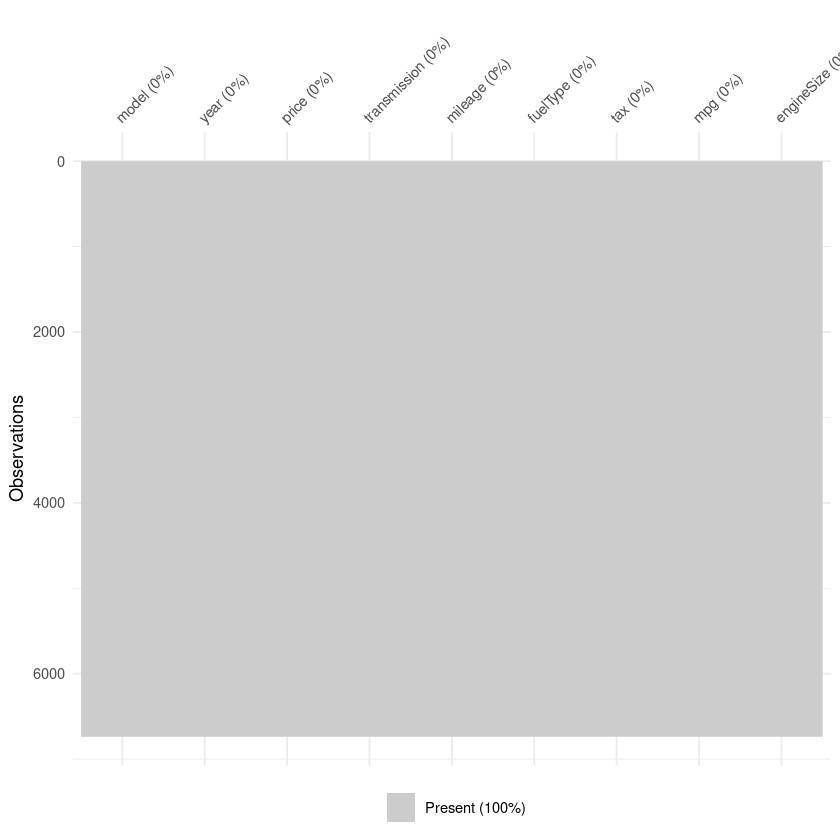

In [4]:
install.packages("naniar")
library(naniar)

vis_miss(toyota)

## Summary of the data

As suspected, there are definitely some features defined as characters that could be more helpful as factors.

In addition, we need to explore some of the outliers in the dataset such as mileage of a 2, very low prices, and others.

We need to keep in mind for future use that it may be best to create dummy variables out of the categorical variables and then scale the numeric variables in order to engage in principle components analysis and learn which features are most important for a predictive model.

In [5]:
summary(toyota)

str(toyota)

    model                year          price       transmission      
 Length:6738        Min.   :1998   Min.   :  850   Length:6738       
 Class :character   1st Qu.:2016   1st Qu.: 8290   Class :character  
 Mode  :character   Median :2017   Median :10795   Mode  :character  
                    Mean   :2017   Mean   :12522                     
                    3rd Qu.:2018   3rd Qu.:14995                     
                    Max.   :2020   Max.   :59995                     
    mileage         fuelType              tax             mpg        
 Min.   :     2   Length:6738        Min.   :  0.0   Min.   :  2.80  
 1st Qu.:  9446   Class :character   1st Qu.:  0.0   1st Qu.: 55.40  
 Median : 18513   Mode  :character   Median :135.0   Median : 62.80  
 Mean   : 22857                      Mean   : 94.7   Mean   : 63.04  
 3rd Qu.: 31064                      3rd Qu.:145.0   3rd Qu.: 69.00  
 Max.   :174419                      Max.   :565.0   Max.   :235.00  
   engineSize   
 Mi

spc_tbl_ [6,738 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ model       : chr [1:6738] "GT86" "GT86" "GT86" "GT86" ...
 $ year        : num [1:6738] 2016 2017 2015 2017 2017 ...
 $ price       : num [1:6738] 16000 15995 13998 18998 17498 ...
 $ transmission: chr [1:6738] "Manual" "Manual" "Manual" "Manual" ...
 $ mileage     : num [1:6738] 24089 18615 27469 14736 36284 ...
 $ fuelType    : chr [1:6738] "Petrol" "Petrol" "Petrol" "Petrol" ...
 $ tax         : num [1:6738] 265 145 265 150 145 260 145 145 150 265 ...
 $ mpg         : num [1:6738] 36.2 36.2 36.2 36.2 36.2 36.2 36.2 36.2 33.2 36.2 ...
 $ engineSize  : num [1:6738] 2 2 2 2 2 2 2 2 2 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   model = col_character(),
  ..   year = col_double(),
  ..   price = col_double(),
  ..   transmission = col_character(),
  ..   mileage = col_double(),
  ..   fuelType = col_character(),
  ..   tax = col_double(),
  ..   mpg = col_double(),
  ..   engineSize = col_double()
  .. )
 - attr(*, "problem

### Distribution of the numeric variables

#### Price

The price variable has a strong positive skew given some expensive cars as outliers in the dataset.

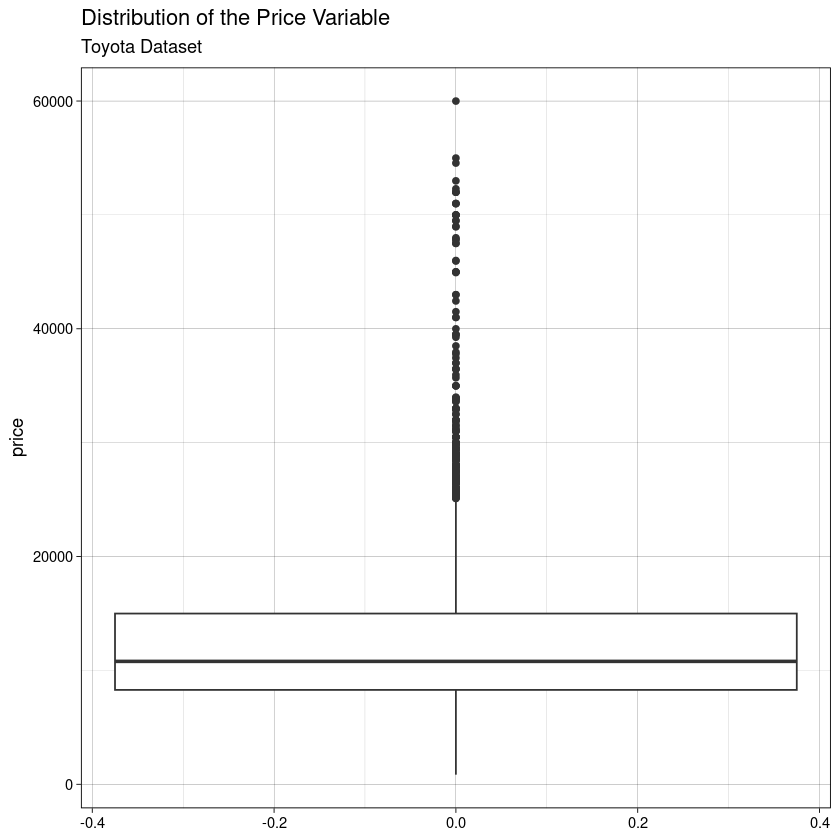

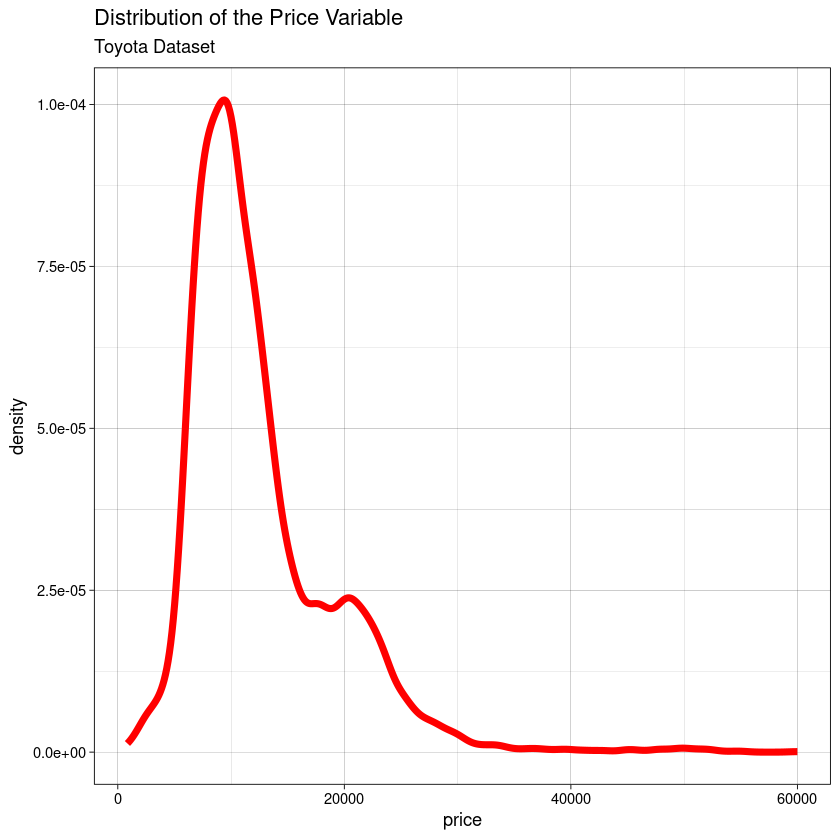

In [6]:
toyota %>% 
ggplot(aes(price)) +
geom_boxplot() +
theme_linedraw() +
labs(title = "Distribution of the Price Variable",
	subtitle = "Toyota Dataset"
	) + 
coord_flip()


toyota %>% 
ggplot(aes(price)) +
geom_density(linewidth = 2,
			color = "red"
			) +
theme_linedraw() +
labs(title = "Distribution of the Price Variable",
	subtitle = "Toyota Dataset"
	)

#### Mileage

Again, strong positive skewness indicating several higher mileage cars.

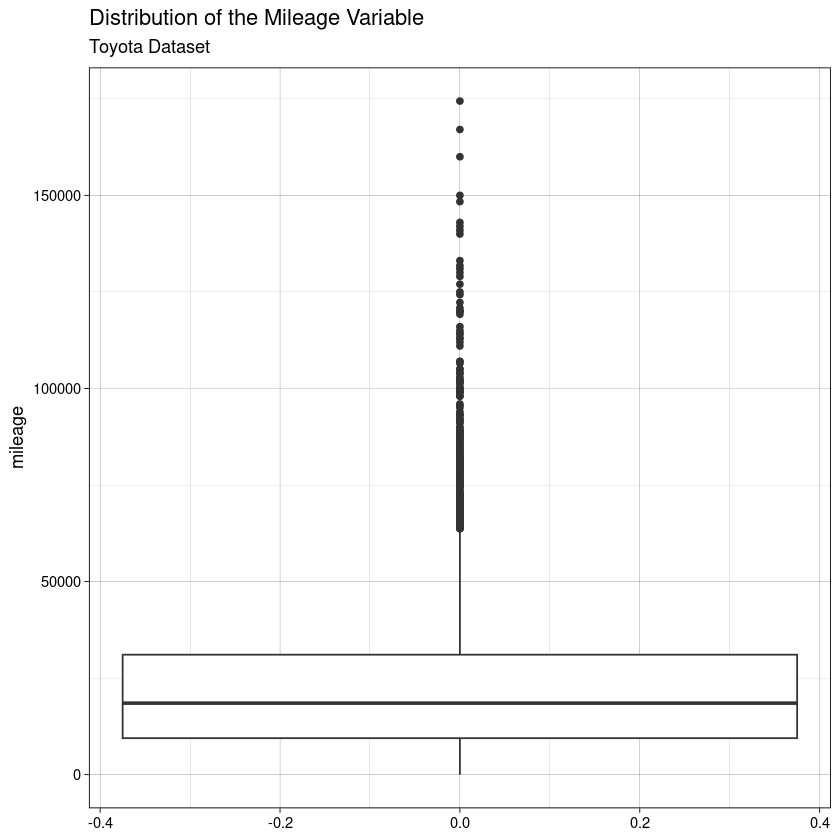

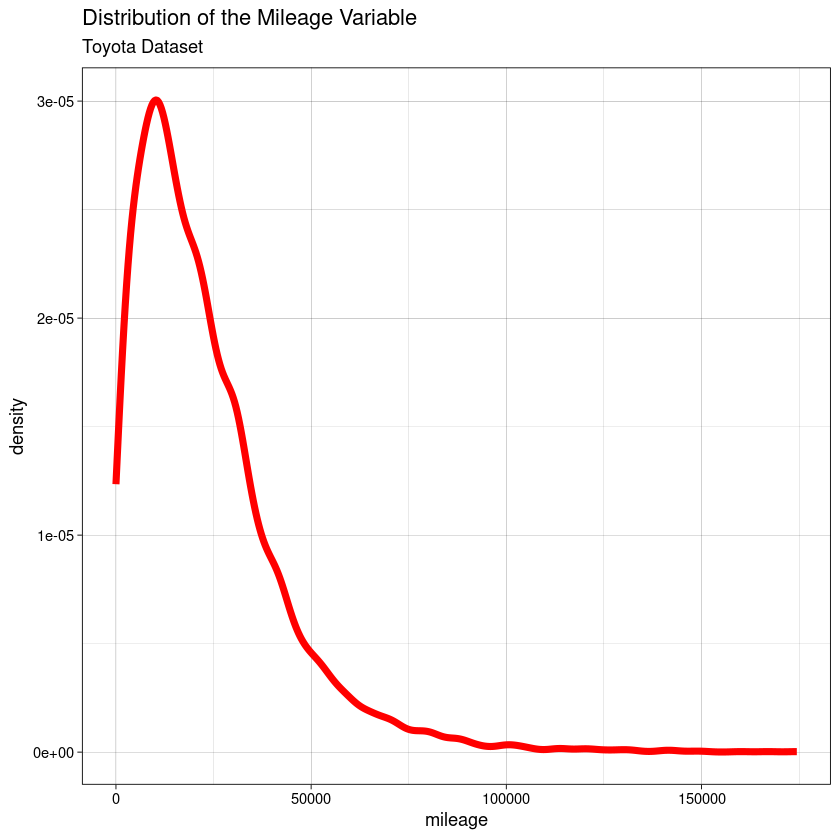

In [7]:
toyota %>% 
ggplot(aes(mileage)) +
geom_boxplot() +
theme_linedraw() +
labs(title = "Distribution of the Mileage Variable",
	subtitle = "Toyota Dataset"
	) + 
coord_flip()


toyota %>% 
ggplot(aes(mileage)) +
geom_density(linewidth = 2,
			color = "red"
			) +
theme_linedraw() +
labs(title = "Distribution of the Mileage Variable",
	subtitle = "Toyota Dataset"
	)

#### Tax

The distribution of tax is leptokurtic, which is a symptom of several cars being taxed around 100-200, and then a number of outliers around 0 and over 200.

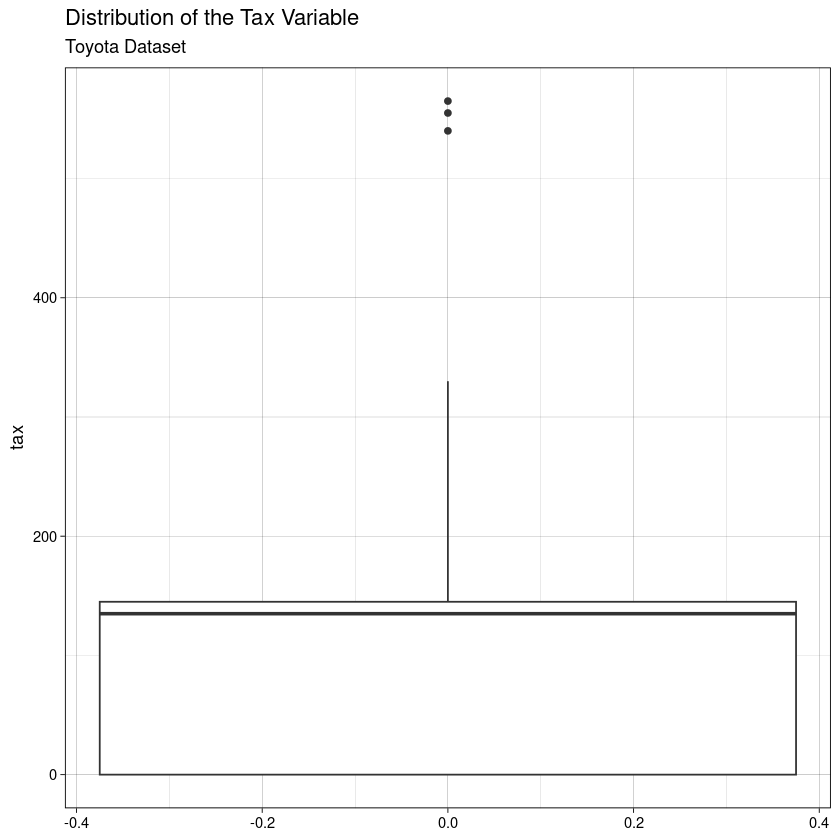

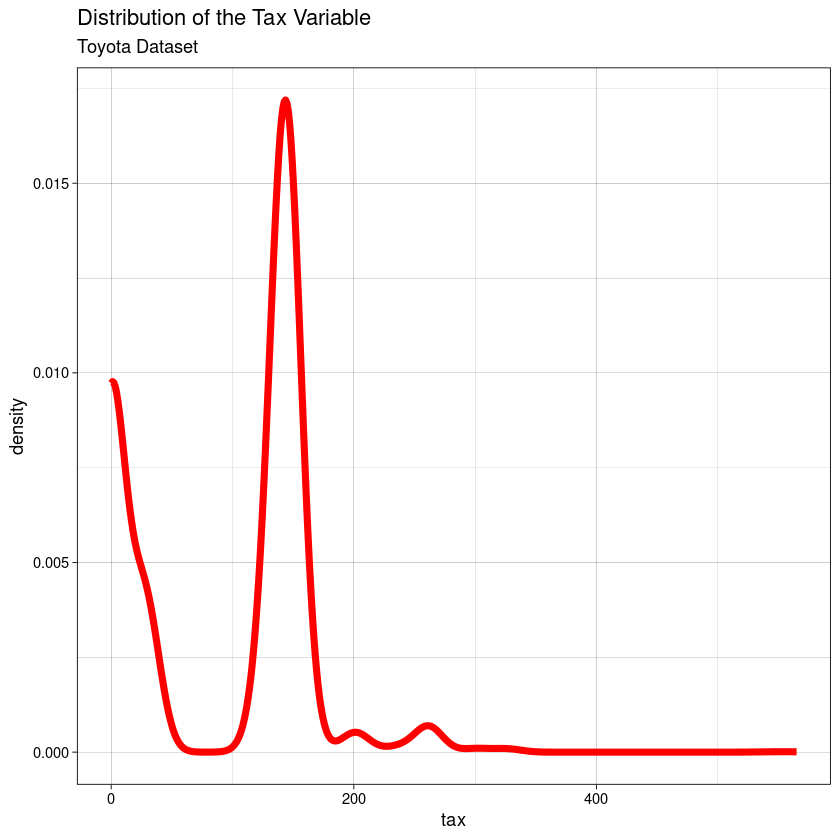

In [8]:
toyota %>% 
ggplot(aes(tax)) +
geom_boxplot() +
theme_linedraw() +
labs(title = "Distribution of the Tax Variable",
	subtitle = "Toyota Dataset"
	) + 
coord_flip()


toyota %>% 
ggplot(aes(tax)) +
geom_density(linewidth = 2,
			color = "red"
			) +
theme_linedraw() +
labs(title = "Distribution of the Tax Variable",
	subtitle = "Toyota Dataset"
	)

#### Miles per gallon

The mpg variable is multimodal and slightly positively skewed, but does approximate a normal distribution looking at the boxplot.  There are several cars that have an mpg of 50, 60, 75, and then 80-90.

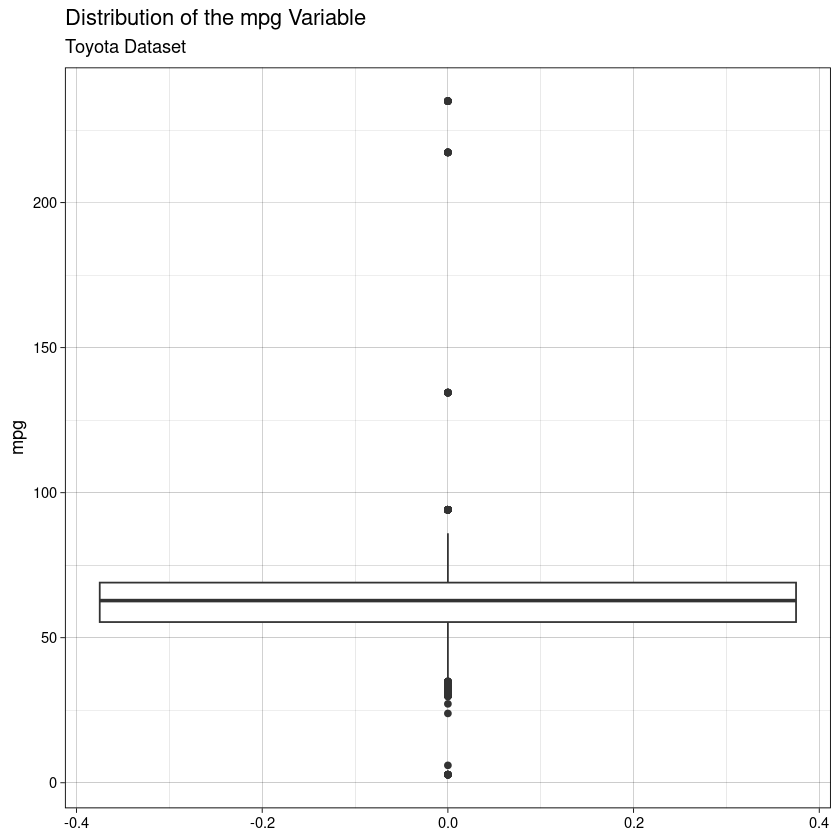

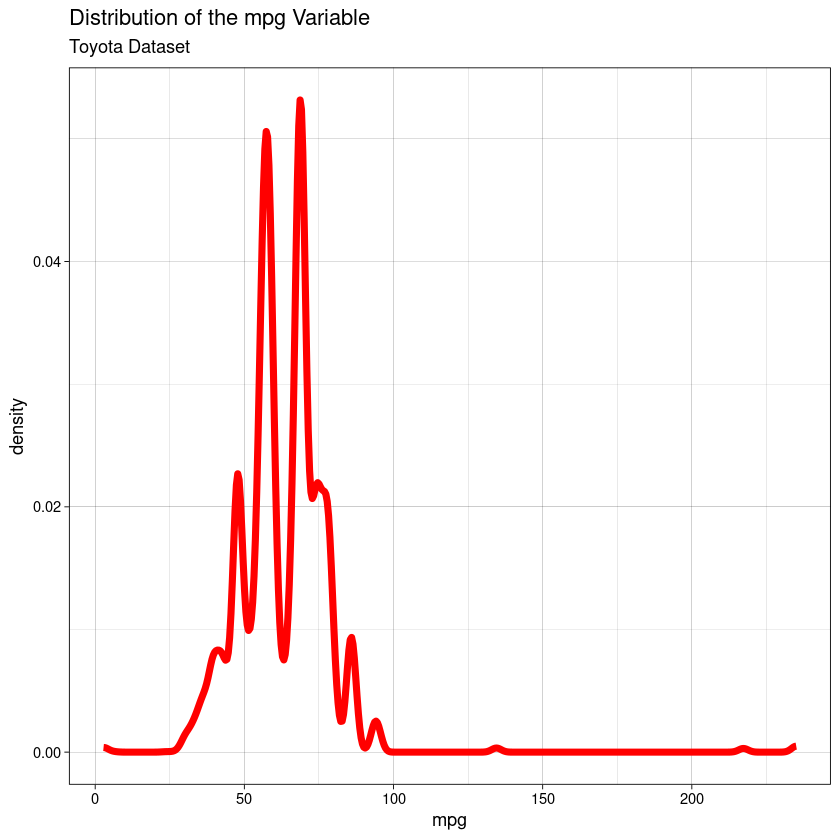

In [9]:
toyota %>% 
ggplot(aes(mpg)) +
geom_boxplot() +
theme_linedraw() +
labs(title = "Distribution of the mpg Variable",
	subtitle = "Toyota Dataset"
	) + 
coord_flip()


toyota %>% 
ggplot(aes(mpg)) +
geom_density(linewidth = 2,
			color = "red"
			) +
theme_linedraw() +
labs(title = "Distribution of the mpg Variable",
	subtitle = "Toyota Dataset"
	)

#### Engine Size

Similar to the other varibables, this variable is non-normally distributed, multimodal, and as some positive skewness.  

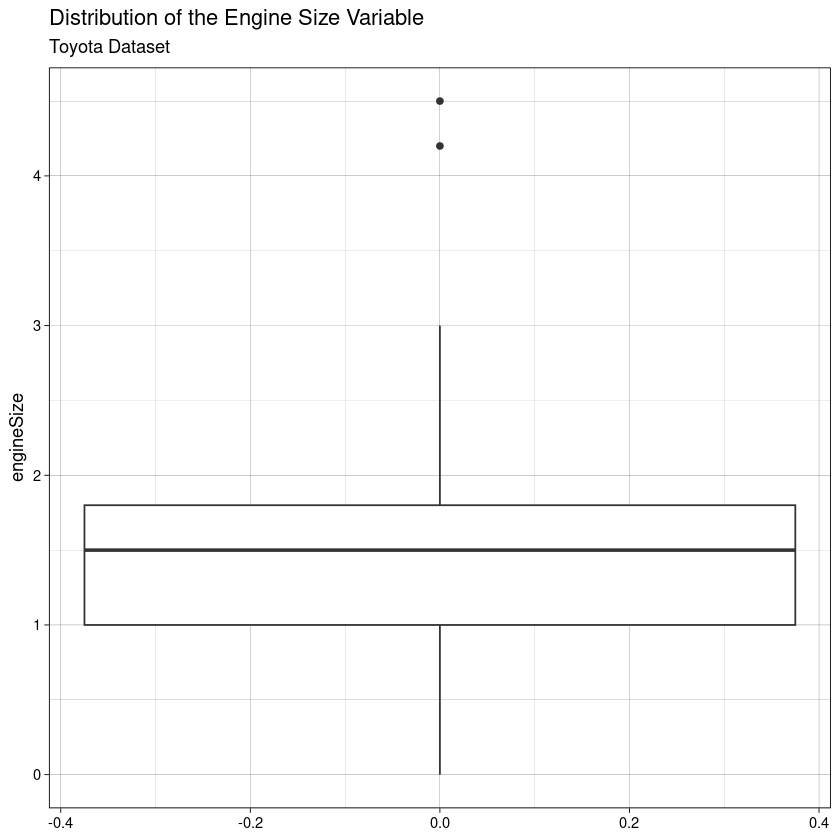

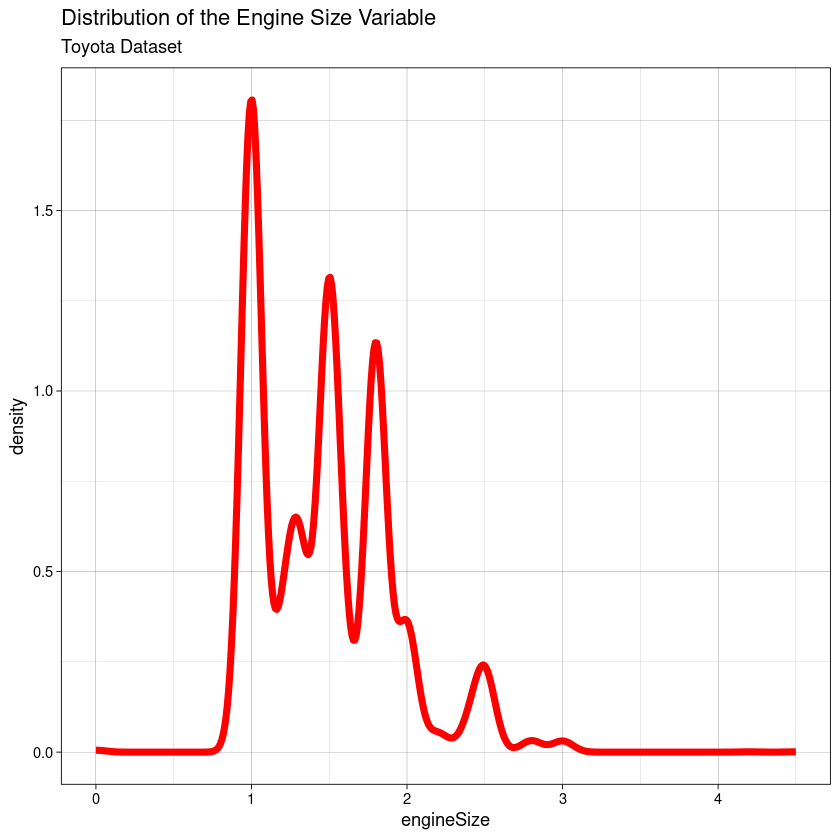

In [10]:
toyota %>% 
ggplot(aes(engineSize)) +
geom_boxplot() +
theme_linedraw() +
labs(title = "Distribution of the Engine Size Variable",
	subtitle = "Toyota Dataset"
	) + 
coord_flip()


toyota %>% 
ggplot(aes(engineSize)) +
geom_density(linewidth = 2,
			color = "red"
			) +
theme_linedraw() +
labs(title = "Distribution of the Engine Size Variable",
	subtitle = "Toyota Dataset"
	)

## Tabulate categorical features to detect problematic outliers

### Year

Curiously, most of the vehicles sold were from 2013 through 2019, with roughly 97% percent of the vehicles in that range. There are 23 different years in which cars were registered, which may be too large a number for a factor.

year,n,percent
<dbl>,<int>,<dbl>
2017,2019,29.9643811
2019,1286,19.0857821
2018,1015,15.0638172
2016,997,14.7966756
2015,525,7.7916296
2014,352,5.2241021
2013,204,3.0276046
2020,128,1.8996735
2012,42,0.6233304


[1] "A total of 97% of vehicles sold in this dataset were registered between 2013-2019"

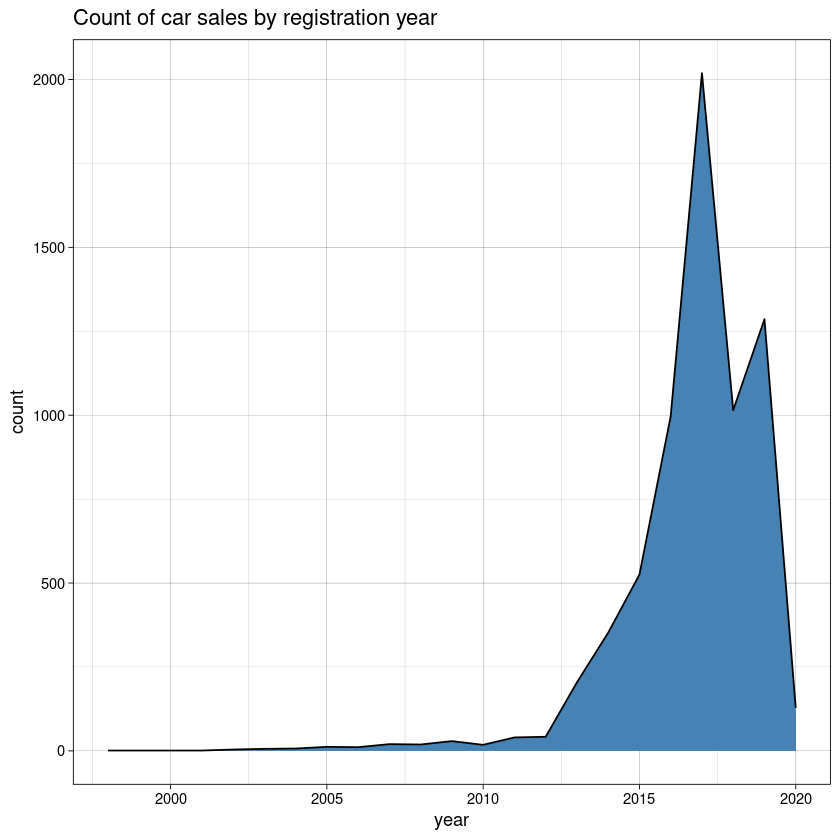

In [11]:
toyota %>% 
  tabyl(year) %>% 
  mutate(percent = percent * 100) %>% 
  arrange(desc(n))

year_counts <- toyota %>% 
  tabyl(year) %>% 
  mutate(percent = percent * 100) %>% 
  arrange(desc(n)) %>%
  filter(year >=2013) %>% 
  summarize(percent = sum(percent)) %>% 
pull(percent)

paste0("A total of ", round(year_counts), "% ", "of vehicles sold in this dataset were registered between 2013-2019")

toyota %>% 
  tabyl(year) %>% 
  mutate(percent = percent * 100) %>% 
  ggplot(aes(year, n)) +
geom_area(fill = "steelblue",
		 color = "black"
		 ) +
labs(title = "Count of car sales by registration year",
	x = "year",
	y = "count"
	) +
theme_linedraw()


### Model

The model column may be better served as a factor, but with 18 levels it would be a bit excessive.  Nothing else unusual here, there are some vehicles that were sold far less than others with the Yaris being the most popular during this timeframe.

Notice how the models are ordered in the second plot nearly the inverse of the first plot based on their price.

Loading required package: viridisLite



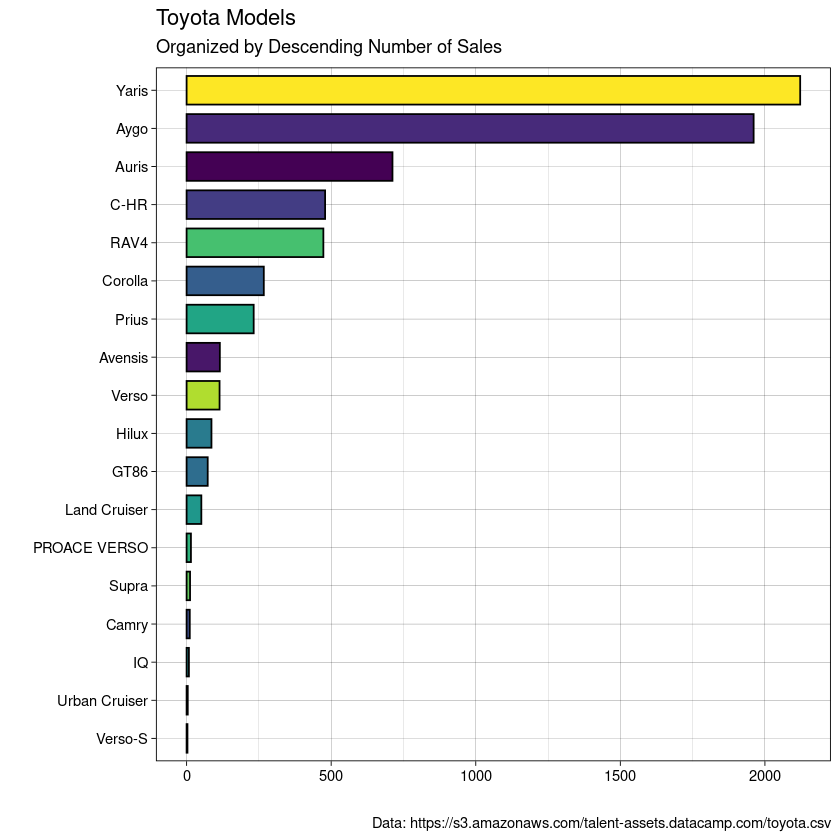

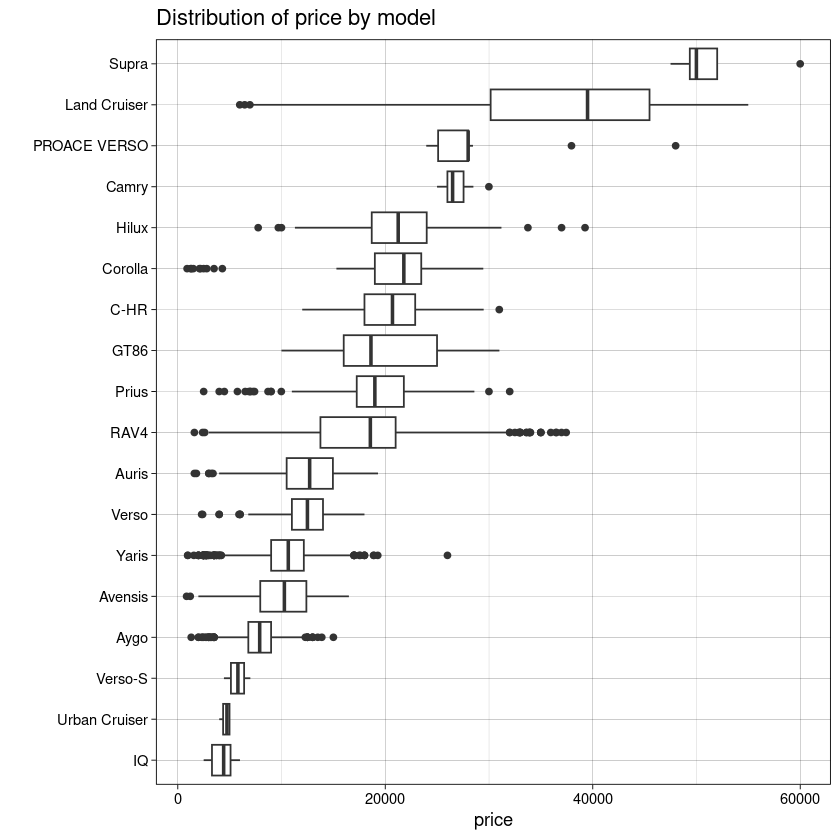

In [12]:
install.packages("viridis", quiet = TRUE)
library(viridis, quietly = TRUE)

toyota %>% 
tabyl(model) %>% 
mutate(percent = percent * 100) %>% 
arrange(desc(n)) %>% 
ggplot(aes(reorder(model, n), n, fill = model)) +
geom_col(color = "black", 
		width = 0.75,
		position = "dodge"
		) +
labs(title = "Toyota Models",
	subtitle = "Organized by Descending Number of Sales",
	x = "",
	y = "",
	caption = "Data: https://s3.amazonaws.com/talent-assets.datacamp.com/toyota.csv"
	) +
coord_flip() +
guides(fill = "none") + 
theme_linedraw() +
scale_fill_viridis_d()

toyota %>% 
ggplot(aes(reorder(model, price), price)) +
geom_boxplot() +
coord_flip() +
theme_linedraw() +
labs(title = "Distribution of price by model",
	x = "",
	y = "price"
	)

### Transmission

This feature should be transformed into a factor, but we need to investigate the "other" outlier.

The 2015 Toyota Yaris had both automatic and manual transmission options.  We will tuck this one under Manual given that the Chicago Tribune reported in May 2015 that the 5 speed manual transmission is standard.

We will clean this up in this segment.

transmission,n,percent
<chr>,<int>,<dbl>
Manual,3826,56.7824280
Automatic,2657,39.4330662
Semi-Auto,254,3.7696646
Other,1,0.0148412


model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Yaris,2015,12795,Other,16733,Hybrid,0,78,1.5


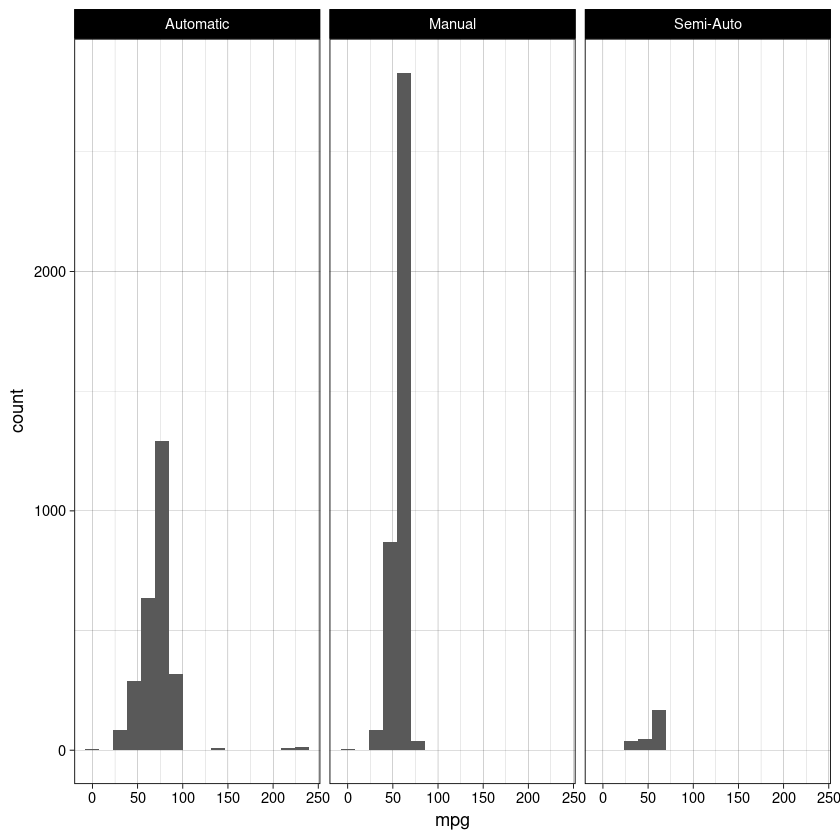

In [13]:
toyota %>% 
  tabyl(transmission) %>% 
  mutate(percent = percent * 100) %>% 
arrange(desc(n))

toyota %>% 
filter(transmission == "Other")

toyota <- toyota %>% 
mutate(transmission = if_else(transmission == "Other", "Manual", transmission)
	  )

toyota %>% 
ggplot(aes(mpg)) +
geom_histogram(bins = 16) + 
facet_wrap(~ transmission) +
theme_linedraw()

### Fuel Type

While the UK wants to encourage less use of petrol and more use of hybrid / electric cars, cars that use petrol made up more than 60% of the sales during the last 6 months.

Something seems to be amiss with the fuelType column.  It will be important to take a closer look at this to make sure that cars that should not be taxed aren't being taxed.  The "other" fuelType is also perplexing.  

In [14]:
toyota %>% 
  tabyl(fuelType) %>% 
  mutate(percent = percent * 100)

toyota %>% 
filter(fuelType == "Other") %>% 
head(n = 25)


fuelType,n,percent
<chr>,<int>,<dbl>
Diesel,503,7.465123
Hybrid,2043,30.320570
Other,105,1.558326
Petrol,4087,60.655981


model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Corolla,2019,22500,Automatic,8006,Other,140,85.6,1.8
Corolla,2020,25990,Automatic,1112,Other,135,53.3,2.0
RAV4,2019,30500,Automatic,13326,Other,140,51.1,2.5
RAV4,2017,18000,Automatic,26972,Other,205,43.5,2.0
RAV4,2017,20000,Automatic,4909,Other,200,43.5,2.0
RAV4,2016,16249,Automatic,27427,Other,200,43.5,2.0
RAV4,2016,19495,Automatic,6574,Other,200,43.5,2.0
Yaris,2016,12300,Automatic,16751,Other,0,78.0,1.5
Yaris,2016,13595,Automatic,15659,Other,0,78.0,1.5


#### Average, minimum, and maximum mpg by fuelType

A look at the average, minimu, and maximum mpg by fuelType.  Could we use the average mpg as a cutoff for Diesel and Petrol vehicles and consider any of those vehicles as truly hybrids?  It seems that we need more information before proceeding to clean this variable.

In [15]:
toyota %>% 
group_by(fuelType) %>% 
summarize(avg_mpg = mean(mpg),
		 max = max(mpg),
		 min = min(mpg)
		 )

fuelType,avg_mpg,max,min
<chr>,<dbl>,<dbl>,<dbl>
Diesel,52.06680,83.1,2.8
Hybrid,75.28218,235.0,43.5
Other,71.18476,235.0,34.5
Petrol,58.06533,86.0,6.0


Here we will summarize the taxation on different fuel types to ensure that everything is working correctly in this dataset.

Given that the "other" fuel type in this dataset is similar to the Petrol fuel type, it makes sense that these may not have been classified correctly and so should be dealt with by modifying them as petrol.

#### Average taxation by fuelType

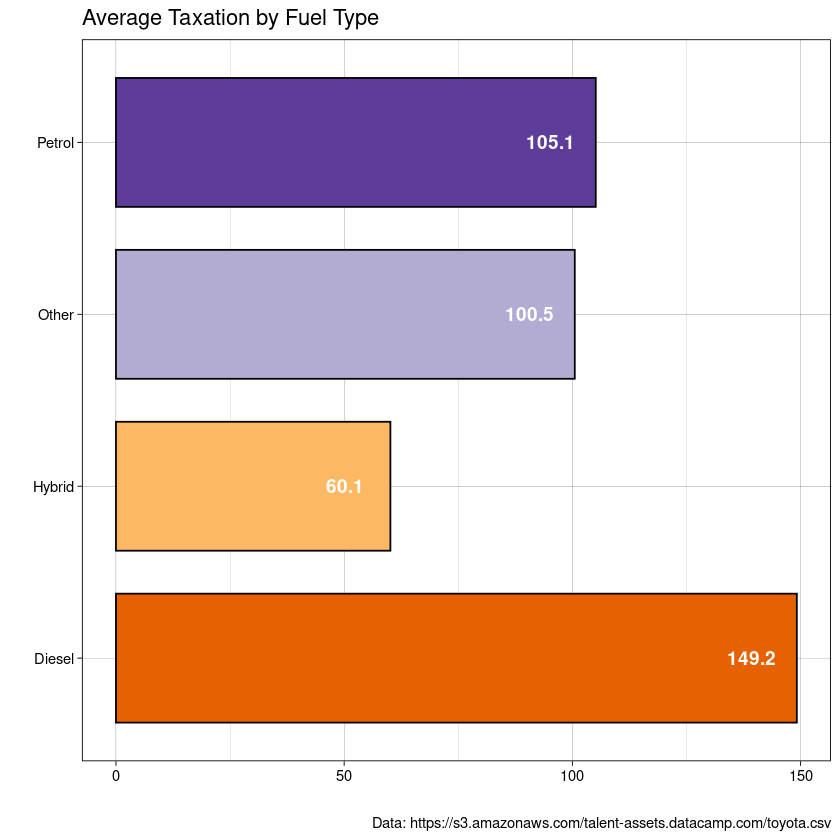

In [16]:
toyota %>% 
group_by(fuelType) %>% 
summarize(avg_tax = mean(tax)) %>% 
arrange(desc(avg_tax)) %>% 
ggplot(aes(fuelType, avg_tax, fill = fuelType, label = round(avg_tax, digits = 1))) + 
geom_col(position = "dodge",
		width = 0.75,
		color = "black"
		) +
geom_text(aes(x = fuelType, y = avg_tax - 10),
		 color = "white",
		 size = 4,
		 fontface = "bold"
		 ) +
coord_flip() +
theme_linedraw() + 
scale_fill_brewer(palette = "PuOr") +
labs(title = "Average Taxation by Fuel Type",
	x = "",
	y = "",
	caption = "Data: https://s3.amazonaws.com/talent-assets.datacamp.com/toyota.csv"
	) +
guides(fill = "none")


#### Another look at fuelType

There are 795 vehicles that were sold that have a tax of 0 and that are not a Hybrid vehicle.  

In [17]:
toyota %>% 
filter(tax == 0 & fuelType != "Hybrid")

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Yaris,2016,7995,Manual,24790,Petrol,0,66.0,1.0
Yaris,2015,6995,Manual,33000,Petrol,0,66.0,1.0
Yaris,2016,8698,Manual,8484,Petrol,0,66.0,1.0
Yaris,2016,7298,Manual,8246,Petrol,0,66.0,1.0
Yaris,2016,7298,Manual,17001,Petrol,0,66.0,1.0
Yaris,2016,6998,Manual,22169,Petrol,0,66.0,1.0
Yaris,2015,7291,Manual,19450,Petrol,0,66.0,1.0
Yaris,2015,6698,Manual,29015,Petrol,0,66.0,1.0
Yaris,2016,7495,Manual,52000,Diesel,0,80.7,1.4


#### Electric cars?

Could the fuelType column contain many data entry errors?  We already know that electric cars are not taxed due to no emissions.  Let's look at a tabulation of fuelType where the tax is 0.

Curiously, there are many cars that are not taxed under Petrol, Diesel, and Other. It makes sense that Hybrid cars may not be taxed.  There are 741 petrol fueled cars that are not taxed at all, which does not seem to fit in this dataset given what we learned from our search of the UK registration requirements.

There are also 27 Diesel and 27 "other" vehicles that were not taxed.  

However, without more information it may be difficult to deal with this problem. Let's move on to engine size.

In [18]:
toyota %>% 
filter(tax == 0) %>% 
tabyl(fuelType) %>% 
mutate(percent = percent * 100) %>% 
arrange(desc(n))

fuelType,n,percent
<chr>,<int>,<dbl>
Hybrid,995,55.58659
Petrol,741,41.39665
Diesel,27,1.50838
Other,27,1.50838


### Engine Size

The engineSize variable has a problematic outlier with 6 vehicles reportedly having an engineSize of 0.

Upon further review online, engine sizes should appear this way:

- 2016 Yaris: 1.5 L
- 2019 Aygo: 1.0
- 2017 C-HR: 1.2

In this segment we will clean up this problem.

engineSize,n,percent
<dbl>,<int>,<dbl>
1.0,2059,30.5580291
1.5,1423,21.1190264
1.8,1289,19.1303057
1.3,601,8.9195607
2.0,398,5.9067973
1.2,303,4.4968833
2.5,249,3.6954586
1.6,169,2.5081627
2.4,70,1.0388839


model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Yaris,2016,12300,Manual,6148,Hybrid,0,86.0,0
Yaris,2016,11000,Automatic,39909,Hybrid,0,86.0,0
Aygo,2019,9800,Manual,3635,Petrol,150,56.5,0
Aygo,2019,8000,Manual,8531,Petrol,145,56.5,0
Aygo,2019,8000,Manual,5354,Petrol,145,56.5,0
C-HR,2017,14300,Manual,46571,Petrol,145,47.1,0


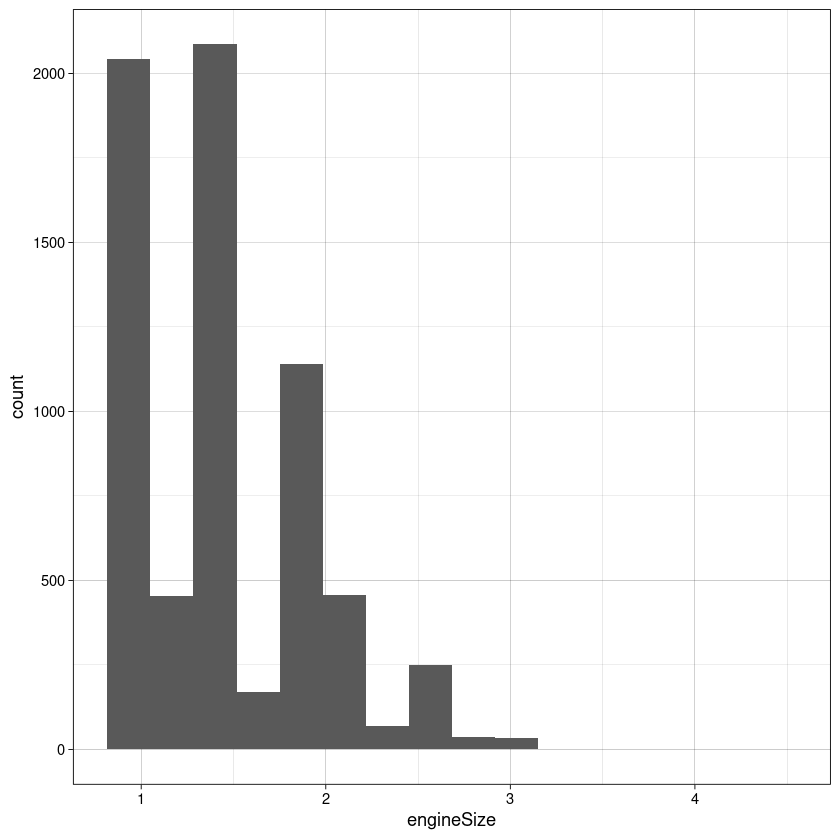

In [19]:
toyota %>% 
  tabyl(engineSize) %>% 
  mutate(percent = percent * 100) %>% 
arrange(desc(n))

toyota %>% 
filter(engineSize == 0)

toyota <- toyota %>% 
mutate(engineSize = if_else(model == "Yaris" & year == 2016, 1.5,
						   if_else(model == "Aygo" & year == 2019, 1,
								  if_else(model == "C-HR" & year == 2017, 1.2, engineSize
										 )
								  )
						   )
	  )

toyota %>% 
ggplot(aes(engineSize)) +
geom_histogram(bins = 16) +
theme_linedraw()

## Model Fitting

### Principal Components Analysis

First, we will start by utilizing principle components analysis and clustering methods to identify the most important features in this dataset that affect the price that the car will sell at.  

Seeing the results of the PCA, it seems that a little more than 80% of the variance in the model can be explaind by only 7 of the features in the dataset.

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.3323 1.3015 1.0066 0.77887 0.69823 0.51041 0.46330
Proportion of Variance 0.2375 0.2267 0.1356 0.08117 0.06523 0.03486 0.02872
Cumulative Proportion  0.2375 0.4642 0.5998 0.68093 0.74617 0.78103 0.80975
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.41425 0.39688 0.36401 0.33186 0.30950 0.28851 0.27572
Proportion of Variance 0.02296 0.02108 0.01773 0.01474 0.01282 0.01114 0.01017
Cumulative Proportion  0.83271 0.85379 0.87152 0.88625 0.89907 0.91021 0.92038
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.25620 0.24359 0.23008 0.21254 0.20926 0.20124 0.19199
Proportion of Variance 0.00878 0.00794 0.00708 0.00604 0.00586 0.00542 0.00493
Cumulative Proportion  0.92916 0.93710 0.94418 0.95023 0.95609 0.96151 0.96644
                          PC22    PC23

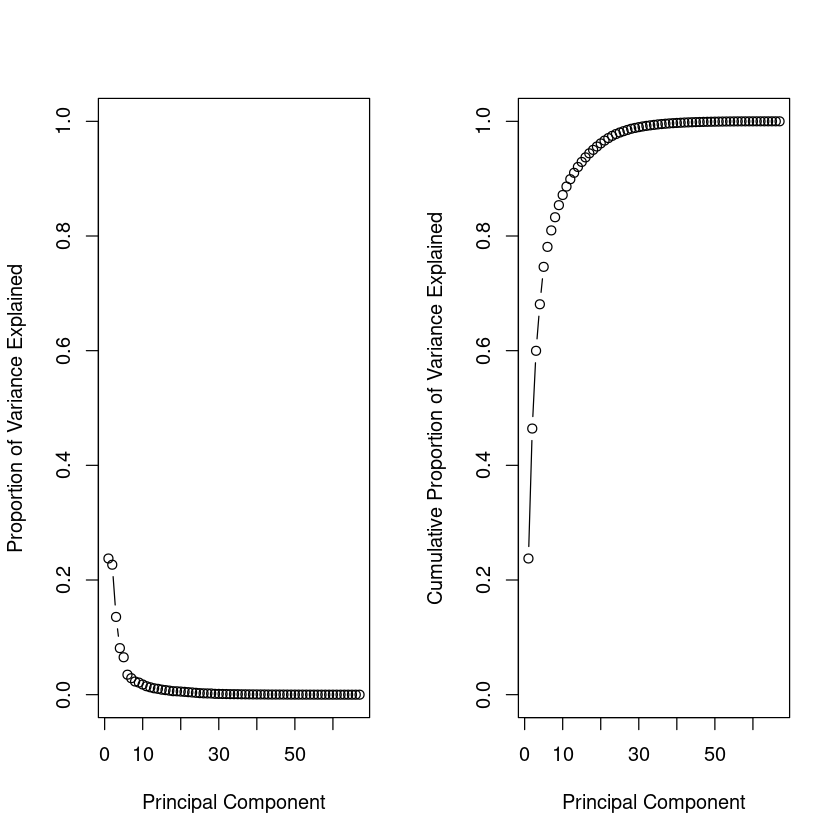

In [20]:
# Convert year to character
toyota <- toyota %>% 
mutate(across(c(year, engineSize), function(x) as.character(x)
			 )
	  )

# Create dummy variables for categorical variables
categorical_vars <- toyota %>% 
  select(model, year, transmission, fuelType, engineSize)

dummy_vars <- dummy_cols(categorical_vars) %>%
  select(-model, -year, -transmission, -fuelType, -engineSize)  # Remove the base levels

# Scale continuous variables
continuous_vars <- toyota %>% 
  select(price, mileage, tax, mpg) %>%
  scale()

# Combine dummy variables and scaled continuous variables
toyota_prep <- cbind(continuous_vars, dummy_vars)

# Perform PCA
pr.toyota <- prcomp(toyota_prep, scale = FALSE)

summary(pr.toyota)

# Make the scree plot
# Getting proportion of variance for a scree plot
pr.var <- pr.toyota$sdev^2
pve <- pr.var / sum(pr.var)
cumulative_pve <- cumsum(pve)

# Plot variance explained for each principal component, including cumulative
par(mfrow = c(1,2))
plot(pve, 
	 xlab ="Principal Component", 
	 ylab ="Proportion of Variance Explained", 
	 ylim =c(0,1), type ="b")

plot(cumulative_pve, 
	 xlab ="Principal Component", 
	 ylab ="Cumulative Proportion of Variance Explained", 
	 ylim =c(0,1), type ="b")

par(mfrow = c(1,1))

### Examine the PCA model further

In [21]:
# Extract loadings matrix from PCA object
loadings <- as.data.frame(pr.toyota$rotation)

# Add variable names as a separate column
loadings <- loadings %>%
  rownames_to_column(var = "Variable")

loadings

# Convert loadings matrix to tidy format
loadings_tidy <- loadings %>%
  gather(PC, Loading, -Variable) %>%
  mutate(PC = gsub("PC", "", PC) %>% as.numeric())

# Identify principal component associated with each variable
var_associations <- loadings %>%
  gather(PC, Loading, -Variable) %>%
  mutate(PC = gsub("PC", "", PC) %>% as.numeric()) %>%
  group_by(Variable) %>%
  filter(Loading == max(abs(Loading))) %>%
  ungroup()

# Print the associations
print(var_associations)

Variable,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,⋯,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
price,2.399033e-02,7.278444e-01,-0.1066354039,6.527446e-02,-2.642536e-01,3.800452e-02,-3.953387e-01,6.886081e-02,-8.711288e-02,⋯,-2.063833e-03,-1.282536e-03,-2.825625e-03,-3.016634e-03,-3.623086e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
mileage,2.754135e-01,-3.313091e-01,-0.7872081514,-2.359141e-01,-5.168035e-04,-2.635162e-02,-1.371405e-01,8.229803e-02,8.881671e-02,⋯,8.994685e-05,-1.180024e-03,-4.722986e-05,-7.374475e-05,-6.895085e-17,-3.363737e-17,-2.899157e-16,-3.946496e-17,3.295975e-17,8.023096e-18
tax,-5.677656e-01,2.458650e-01,-0.1601308962,-6.085947e-01,3.734817e-01,7.954874e-03,6.655303e-02,1.205700e-02,4.006858e-02,⋯,1.415204e-03,-1.632877e-04,1.005725e-04,1.027941e-03,-1.042754e-16,3.621018e-16,-7.830964e-17,-1.012039e-16,-3.190014e-16,5.907193e-17
mpg,5.932477e-01,6.495533e-03,0.4007634976,-4.835462e-01,3.001605e-01,8.526132e-03,-3.276555e-01,-4.992413e-02,9.183177e-03,⋯,-3.516196e-04,4.548141e-05,-1.269981e-04,2.966292e-04,-1.620140e-17,-5.790764e-16,-1.204956e-16,1.809659e-17,5.155828e-17,-4.801077e-18
model_Auris,7.582768e-02,7.326938e-03,-0.0493653214,1.593353e-03,-5.629281e-02,-9.541286e-03,2.377620e-01,-4.153751e-01,-7.273553e-02,⋯,2.180272e-03,-1.649610e-03,-4.397663e-03,5.103401e-02,-1.458076e-01,2.548509e-02,5.442639e-02,-3.587962e-02,1.713000e-01,7.276467e-03
model_Avensis,-4.264558e-04,-7.035296e-03,-0.0238457333,-9.804575e-03,-4.255997e-03,-2.058884e-03,-2.746533e-02,-2.486955e-02,-1.360051e-02,⋯,-1.628856e-03,-1.007695e-03,-4.886338e-03,4.025246e-02,-1.458076e-01,2.548509e-02,5.442639e-02,-3.587962e-02,1.713000e-01,7.276467e-03
model_Aygo,-6.255637e-02,-1.721836e-01,0.2272730336,-2.272669e-01,-2.773438e-01,-8.237399e-02,9.608264e-02,2.987983e-01,6.422788e-02,⋯,6.556790e-03,-2.926593e-03,-6.413807e-03,7.137290e-02,-1.458076e-01,2.548509e-02,5.442639e-02,-3.587962e-02,1.713000e-01,7.276467e-03
model_C-HR,1.383615e-02,6.956363e-02,-0.0094386377,-2.618016e-02,-3.790137e-02,8.894348e-02,4.109260e-03,-8.000715e-02,-1.277127e-01,⋯,4.457874e-03,-5.259058e-04,-9.620622e-05,5.404170e-02,-1.458076e-01,2.548509e-02,5.442639e-02,-3.587962e-02,1.713000e-01,7.276467e-03
model_Camry,-3.900344e-04,2.732349e-03,-0.0002907876,9.664300e-04,-2.139057e-03,-1.869040e-03,1.633355e-04,3.911456e-03,4.199422e-03,⋯,-5.121298e-04,-7.171277e-04,1.654993e-03,2.578056e-02,-1.458076e-01,2.548509e-02,5.442639e-02,-3.587962e-02,1.713000e-01,7.276467e-03


# A tibble: 33 × 3
   Variable          PC Loading
   <chr>          <dbl>   <dbl>
 1 mpg                1   0.593
 2 price              2   0.728
 3 model_Yaris        5   0.512
 4 engineSize_1.5     5   0.474
 5 year_2017          6   0.866
 6 year_2019          9   0.646
 7 engineSize_1.3    13   0.408
 8 engineSize_2      17   0.621
 9 model_Corolla     21   0.458
10 year_2013         22   0.799
# … with 23 more rows


### Use K-Means clustering to better understand the variables that will inform a linear regression model

Ultimately, this is not a clustering problem as we are trying to get predictions of price using a robust linear model.

However, it is interesting to look at how the variables can be clustered and understood in new ways.

It may be important for the sales team to look at how price can be understood using a clustering model in the future to have a more granular understanding of what types of cars tend to be sold at specific price levels.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,KMeans_Cluster,HClust_Cluster
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>
1,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2,4,1
2,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2,4,1
3,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2,4,1
4,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2,4,1
5,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2,4,1
6,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2,4,1
7,GT86,2017,18522,Manual,10456,Petrol,145,36.2,2,4,1
8,GT86,2017,18995,Manual,12340,Petrol,145,36.2,2,4,1
9,GT86,2020,27998,Manual,516,Petrol,150,33.2,2,4,1


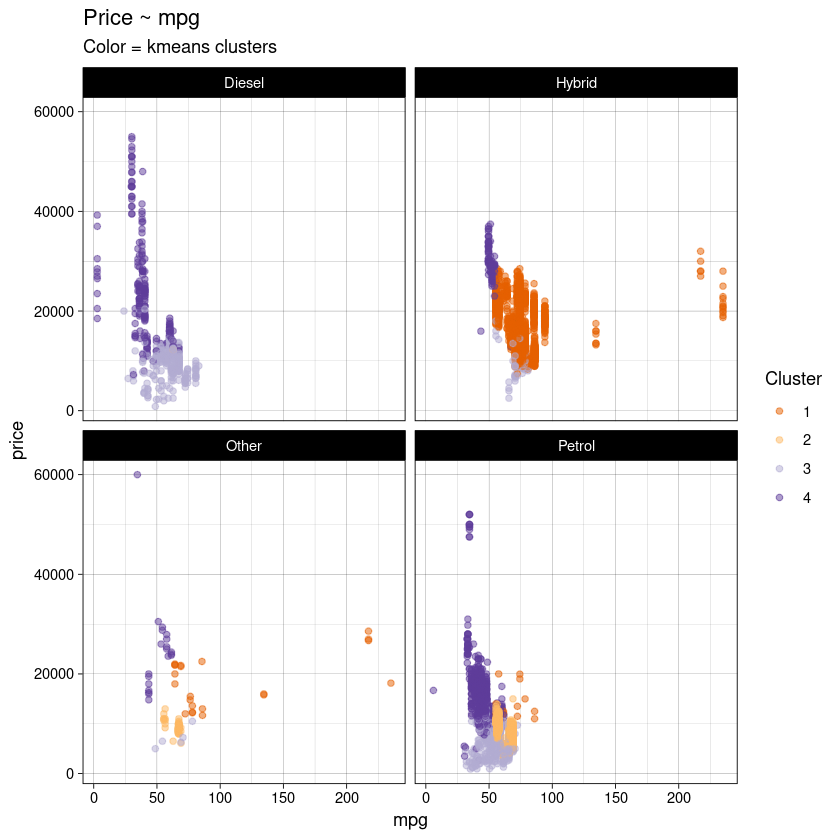

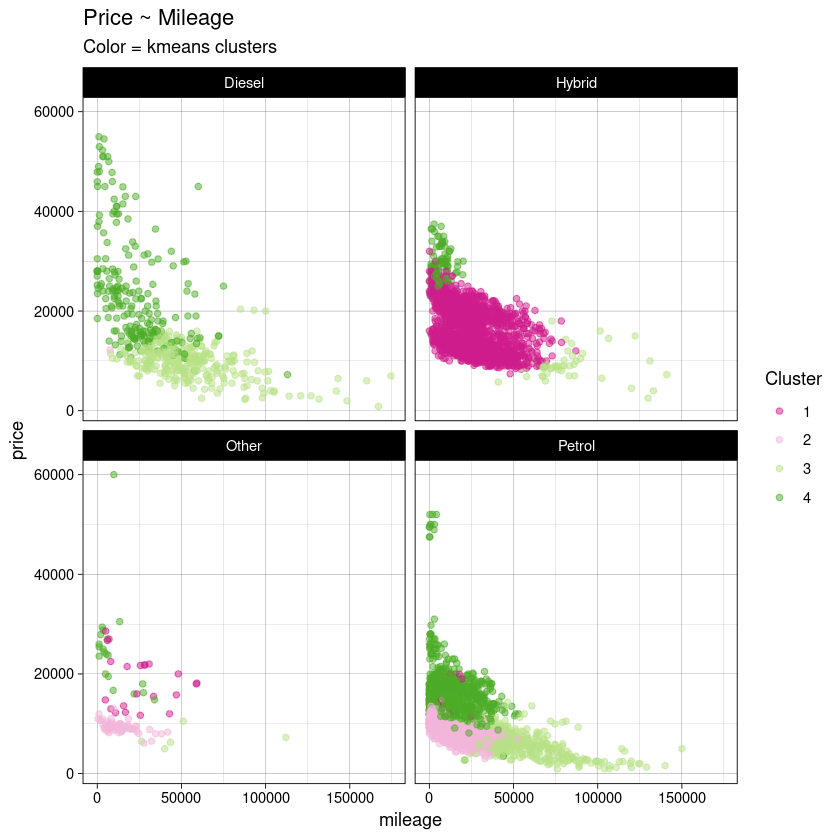

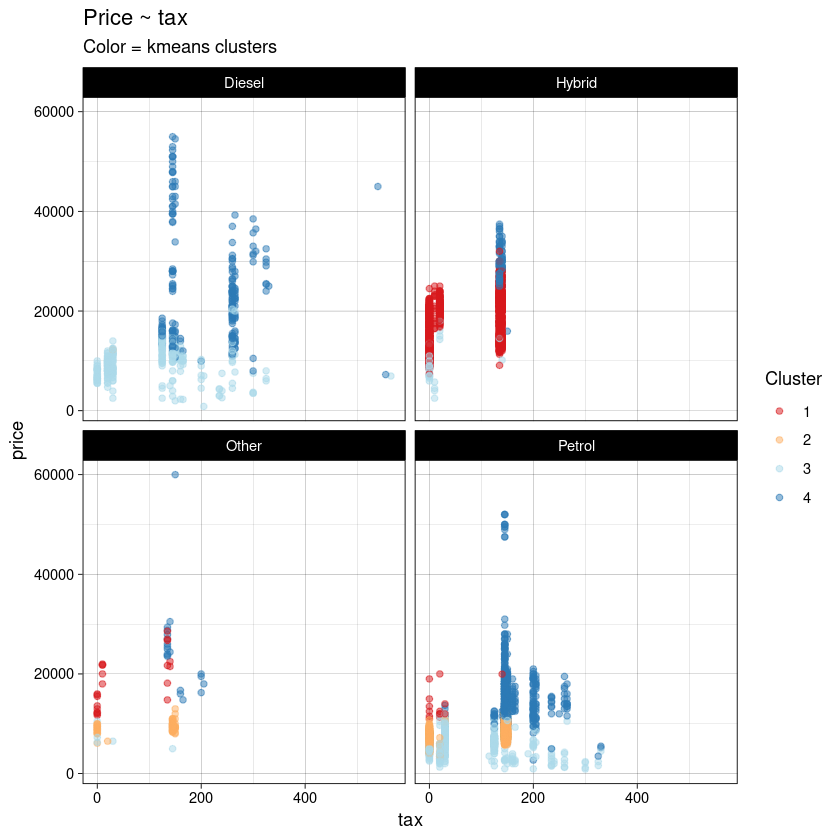

In [22]:
# Perform k-means clustering
kmeans_result <- kmeans(toyota_prep, centers = 4)

# Get the cluster assignments for each row
kmeans_clusters <- kmeans_result$cluster

# Perform hierarchical clustering
hclust_result <- hclust(dist(toyota_prep))

# Cut the dendrogram to obtain cluster assignments
hclust_clusters <- cutree(hclust_result, k = 4)

# Add the cluster assignments to the original dataset
toyota_clustered <- cbind(toyota, KMeans_Cluster = kmeans_clusters, HClust_Cluster = hclust_clusters)

# View the clustered dataset
head(toyota_clustered, n = 100)

toyota_clustered %>% 
ggplot(aes(mpg, price, color = as.character(KMeans_Cluster))) + 
geom_point(alpha = 0.5) + 
labs(color = "Cluster", title = "Price ~ mpg", subtitle = "Color = kmeans clusters") +
theme_linedraw() + 
scale_color_brewer(palette = "PuOr") +
facet_wrap(~fuelType)

toyota_clustered %>% 
ggplot(aes(mileage, price, color = as.character(KMeans_Cluster))) + 
geom_point(alpha = 0.5) + 
labs(color = "Cluster", title = "Price ~ Mileage", subtitle = "Color = kmeans clusters") +
theme_linedraw() + 
scale_color_brewer(palette = "PiYG") +
facet_wrap(~fuelType)

toyota_clustered %>% 
ggplot(aes(tax, price, color = as.character(KMeans_Cluster))) + 
geom_point(alpha = 0.5) + 
labs(color = "Cluster", title = "Price ~ tax", subtitle = "Color = kmeans clusters") +
theme_linedraw() + 
scale_color_brewer(palette = "RdYlBu") +
facet_wrap(~fuelType)

### Creating a linear model with all variables

Our sales team has a problem that calls for linear regression modeling so that we can make predictions about what price vehicles will be sold at.  We will proceed with providing our sales team with this information.

#### Start with as many predictors as indicated in the clustering above.

This model explains 89% of the variance in price, and on average predicts price within 31% of the actual price.  The RMSE is significantly lower than the standard deviation in the training dataset, but this model does not meet the needs of the sales team.

Joining with `by = join_by(model, year, price, transmission, mileage, fuelType,
tax, mpg, engineSize)`


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),12390.6910054,2.890222e+02,42.871070,0.000000e+00
mileage,-0.1220903,1.747648e-03,-69.859772,0.000000e+00
tax,2.0603458,4.977296e-01,4.139489,3.537766e-05
fuelTypeHybrid,5824.6727982,1.715544e+02,33.952347,1.094612e-227
fuelTypeOther,4194.3073432,2.930605e+02,14.312089,1.429612e-45
fuelTypePetrol,1867.8923272,1.809649e+02,10.321851,9.894250e-25
modelAvensis,2845.4485429,2.726153e+02,10.437598,3.019278e-25
modelAygo,-3955.5815618,1.314794e+02,-30.085184,5.375684e-183
modelC-HR,5823.7284643,1.487206e+02,39.158857,5.436760e-293


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8922456,0.8917528,2098.392,1810.519,0,23,-45807.89,91665.79,91828.98,22143940936,5029,5053


price,mileage,tax,mpg,fuelType,model,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10000,22518,30,55.0,Petrol,Yaris,9325.855,674.14467,0.0010563493,2098.579,4.552472e-06,0.32143708
10995,22422,145,56.5,Petrol,Yaris,9564.201,1430.79863,0.0008605926,2098.504,1.670006e-05,0.68214835
8995,36500,0,80.7,Hybrid,Yaris,11337.039,-2342.03862,0.0017390064,2098.340,9.057671e-05,-1.11708279
19990,23165,145,43.5,Petrol,RAV4,18627.903,1362.09663,0.0046772422,2098.512,8.288832e-05,0.65063783
6594,7866,0,69.0,Petrol,Aygo,8868.177,-2274.17695,0.0013127919,2098.355,6.441706e-05,-1.08448331
14498,11313,0,76.4,Hybrid,Auris,16308.809,-1810.80930,0.0023733276,2098.445,7.399161e-05,-0.86397674
8490,36512,150,58.9,Petrol,Yaris,7837.748,652.25245,0.0011377781,2098.581,4.590852e-06,0.31101138
9695,11792,145,58.9,Petrol,Yaris,10845.518,-1150.51835,0.0009141567,2098.538,1.147143e-05,-0.54853647
15791,24984,0,70.6,Hybrid,Auris,14679.595,1111.40502,0.0021318368,2098.542,2.502464e-05,0.53021148


RMSE,RMS_relative_error
<dbl>,<dbl>
2093.403,0.3181504


Std_dev
<dbl>
6377.908


`geom_smooth()` using formula = 'y ~ x'


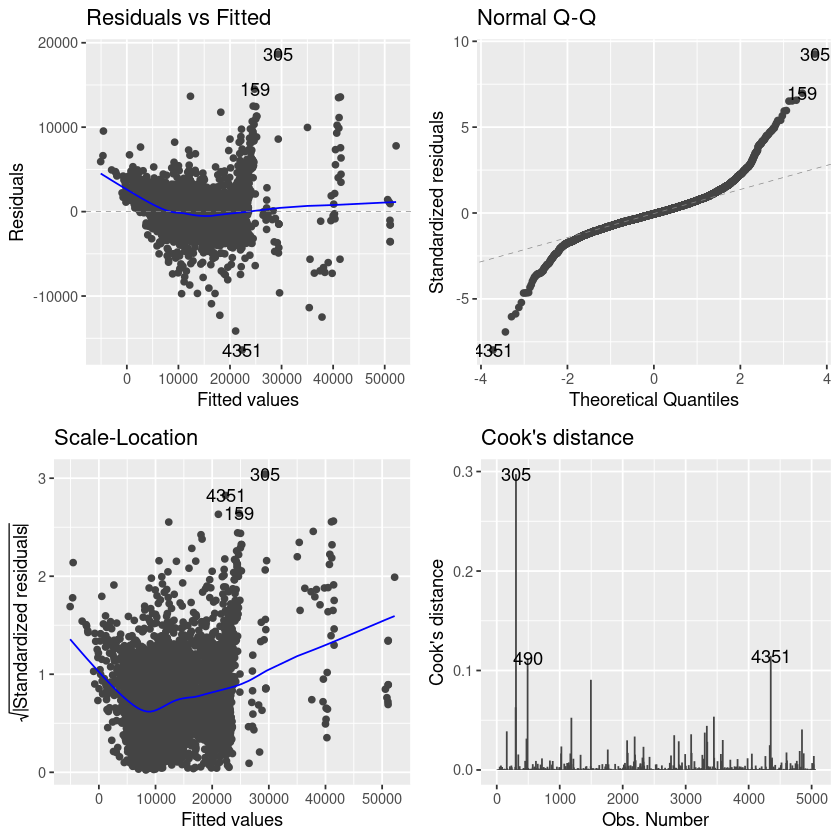

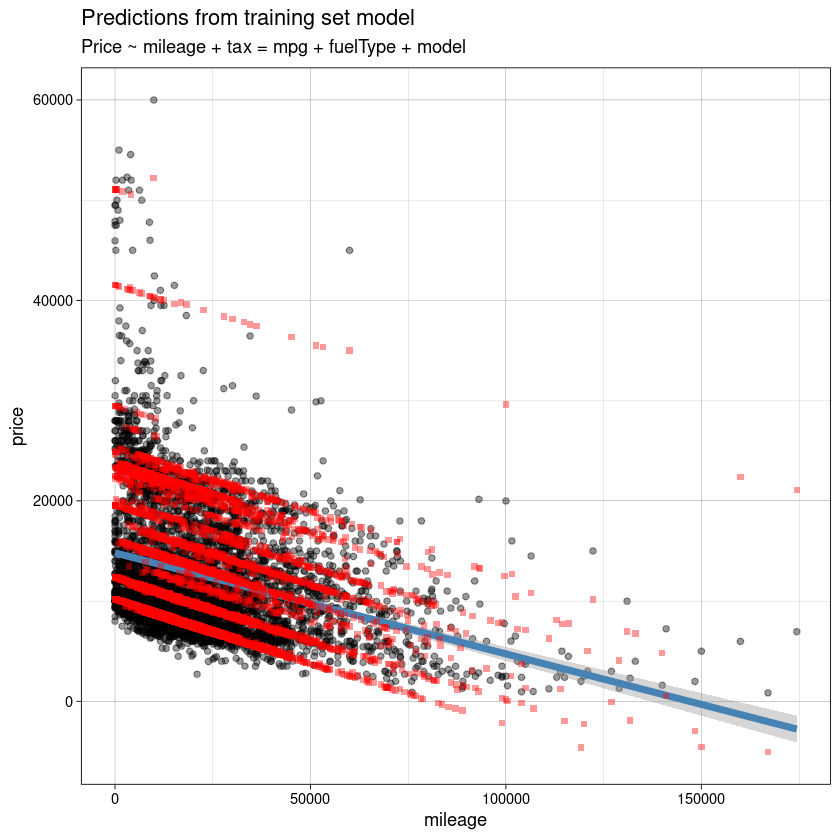

In [61]:
# An intuitive model.

# Model creation
set.seed(123)  # For reproducibility

train_data <- toyota %>%
  slice_sample(prop = 0.75)  # 75% for training

test_data <- toyota %>%
  anti_join(train_data)  # Remaining data for testing

# Convert year to factor in both training and test data
train_data$year <- factor(train_data$year)
test_data$year <- factor(test_data$year)

# Make sure factor levels are consistent between training and test data
test_data$year <- factor(test_data$year, levels = levels(train_data$year))

model1 <- lm(price ~ mileage + tax + mpg + fuelType + model, train_data)

# View model performance
# Assess the model performance using the broom package

tidy_model1 <- tidy(model1)
glance_model1 <- glance(model1)
augmented_data1 <- augment(model1)

# Print the tidy model summary
# Only show items statistically significant at the p < .001 level
tidy_model1 %>%  filter(p.value < .001)

# Print the glance model summary
glance_model1

# Print the augmented dataset with predictions
augmented_data1

augmented_data1 %>% 
summarize(RMSE = sqrt(mean(.resid^2)),
		  RMS_relative_error = sqrt(mean((.resid/price)^2))
		 )

train_data %>% 
summarize(Std_dev = sd(price))

augmented_data1 %>% 
ggplot(aes(mileage, price)) + 
geom_point(alpha = 0.4) +
geom_smooth(color = "steelblue",
		   linewidth = 2,
			method = "lm"
		   ) +
geom_point(aes(mileage, .fitted),
		  color = "red",
		  shape = 15,
		  alpha = 0.4
		  ) + 
labs(title = "Predictions from training set model",
	subtitle = "Price ~ mileage + tax = mpg + fuelType + model"
	) +
theme_linedraw()


#### Training an improved model for predictions

The model performs fairly well with a low RMSE compared to the standard deviation, but the residuals are non-normally distributed upon examination of the plots.

The model seems to explain 94% of the variance in the price variable, so could provide good predictions but, on average, the predictions have an error of about 17.88% relative to the actual prices.  This does not meet the sales' team's goal of predictions within 10% of the sales price.

Joining with `by = join_by(model, year, price, transmission, mileage, fuelType,
tax, mpg, engineSize)`


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.488668e+04,1.918765e+03,7.758471,1.035229e-14
modelAvensis,9.739440e+02,2.239372e+02,4.349184,1.393671e-05
modelAygo,-1.812195e+03,4.078648e+02,-4.443126,9.057894e-06
modelC-HR,5.649457e+03,1.231304e+02,45.881898,0.000000e+00
modelCamry,3.515626e+03,5.849560e+02,6.010069,1.986073e-09
modelCorolla,3.555539e+03,1.540744e+02,23.076766,4.804419e-112
modelGT86,5.228049e+03,3.120379e+02,16.754533,2.419213e-61
modelHilux,3.618755e+03,8.200948e+02,4.412605,1.042853e-05
modelLand Cruiser,1.298817e+04,1.168001e+03,11.120005,2.155505e-28


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9436551,0.9429893,1522.848,1417.321,0,59,-44169.81,88461.61,88859.8,11579092674,4993,5053


price,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<chr>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10000,Yaris,2016,Manual,22518,Petrol,30,55.0,1.5,8702.508,1297.491990,0.002571660,1522.889,3.127485e-05,0.853114555
10995,Yaris,2018,Manual,22422,Petrol,145,56.5,1.5,10167.616,827.384273,0.002211302,1522.955,1.092751e-05,0.543915568
8995,Yaris,2013,Automatic,36500,Hybrid,0,80.7,1.5,9303.063,-308.062874,0.008836316,1522.994,6.134724e-06,-0.203193677
19990,RAV4,2018,Automatic,23165,Petrol,145,43.5,2,19278.298,711.702233,0.018174827,1522.966,6.863323e-05,0.471655350
6594,Aygo,2017,Manual,7866,Petrol,0,69.0,1,8324.520,-1730.520126,0.002317578,1522.803,5.011166e-05,-1.137690188
14498,Auris,2015,Automatic,11313,Hybrid,0,76.4,1.8,14617.152,-119.152352,0.005032549,1522.999,5.186940e-07,-0.078440743
8490,Yaris,2017,Manual,36512,Petrol,150,58.9,1.5,8475.566,14.434072,0.002684980,1523.000,4.041939e-09,0.009491093
9695,Yaris,2017,Manual,11792,Petrol,145,58.9,1.5,9873.152,-178.152327,0.002428486,1522.998,5.566296e-07,-0.117128612
15791,Auris,2015,Automatic,24984,Hybrid,0,70.6,1.8,13820.833,1970.167170,0.004403186,1522.744,1.239202e-04,1.296596506


RMSE,RMS_relative_error
<dbl>,<dbl>
1513.779,0.1788357


Std_dev
<dbl>
6377.908


Warning message:
“Removed 2500 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_segment()`).”
`geom_smooth()` using formula = 'y ~ x'


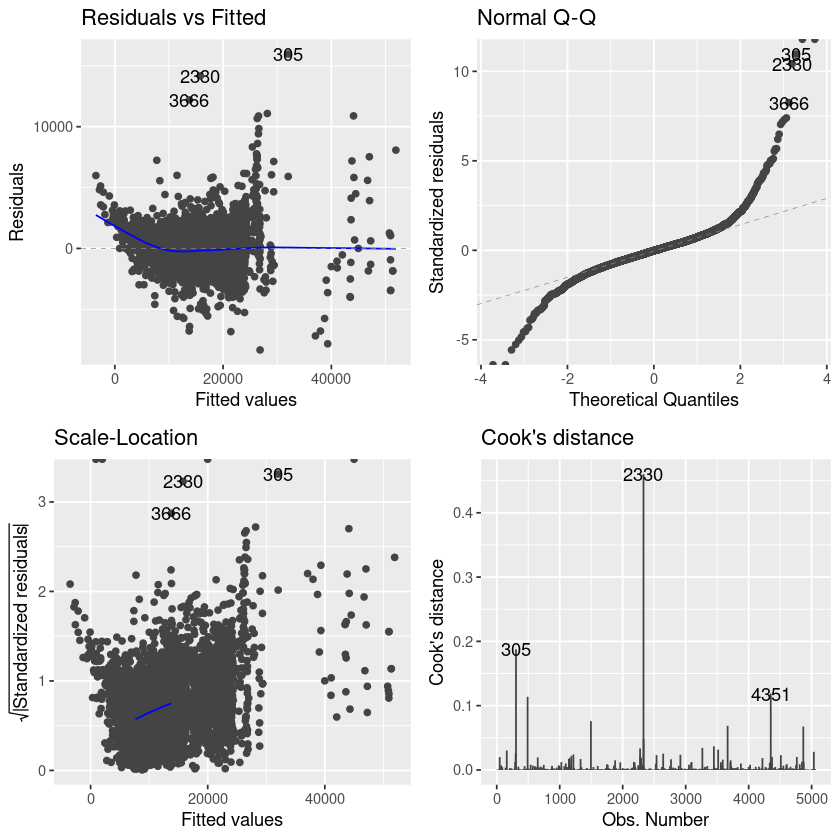

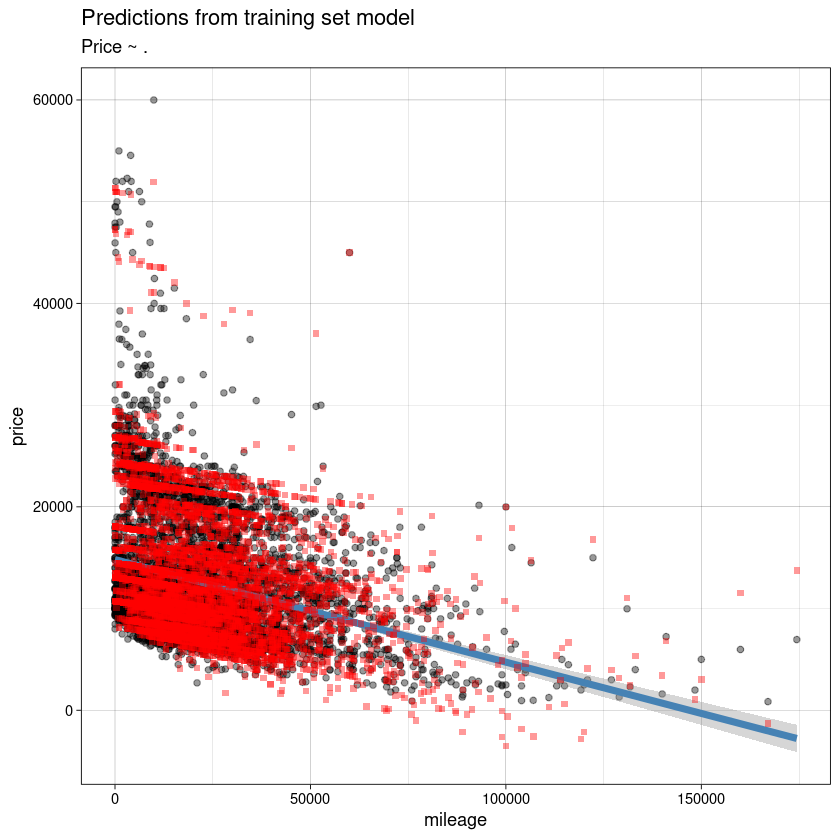

In [50]:
# Create the linear model based on the clustering algorithm results
install.packages("ggfortify", quiet = TRUE)
library(ggfortify, quietly = TRUE)
library(broom, quietly = TRUE)

# Model creation

price_model <- lm(price ~ ., data = train_data)

# View model performance
# Assess the model performance using the broom package

tidy_model <- tidy(price_model)
glance_model <- glance(price_model)
augmented_data <- augment(price_model)

# Print the tidy model summary
# Only show items statistically significant at the p < .001 level
tidy_model %>%  filter(p.value < .001)

# Print the glance model summary
glance_model

# Print the augmented dataset with predictions
augmented_data

augmented_data %>% 
summarize(RMSE = sqrt(mean(.resid^2)),
		  RMS_relative_error = sqrt(mean((.resid/price)^2))
		 )

train_data %>% 
summarize(Std_dev = sd(price))

augmented_data %>% 
ggplot(aes(mileage, price)) + 
geom_point(alpha = 0.4) +
geom_smooth(color = "steelblue",
		   linewidth = 2,
			method = "lm"
		   ) +
geom_point(aes(mileage, .fitted),
		  color = "red",
		  shape = 15,
		  alpha = 0.4
		  ) + 
labs(title = "Predictions from training set model",
	subtitle = "Price ~ ."
	) +
theme_linedraw()

### Linear model with the test data for predictions

The model performs fairly well with a low RMSE compared to the standard deviation.

The model seems to explain 94% of the variance in the price variable, so could provide good predictions but, on average, the predictions have an error of about 15.28% relative to the actual prices.  This is an improvement from the training dataset as, while the RMSE is higher in test, the average error is lower which indicates improvement.  The model performance on the test set may prove to show that this model is a better fit.

We need to proceed with caution with this model, though, as there may be an issue of collinearity in the model.  I did not have time to parse this issue, but this could be addressed in a future model with more time.

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `predicted = predict(price_model, newdata = test_data)`.
Caused by warning in `predict.lm()`:
! prediction from a rank-deficient fit may be misleading”


RMSE,RMS_relative_error
<dbl>,<dbl>
1416.964,0.152753


Std_dev
<dbl>
6268.199


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


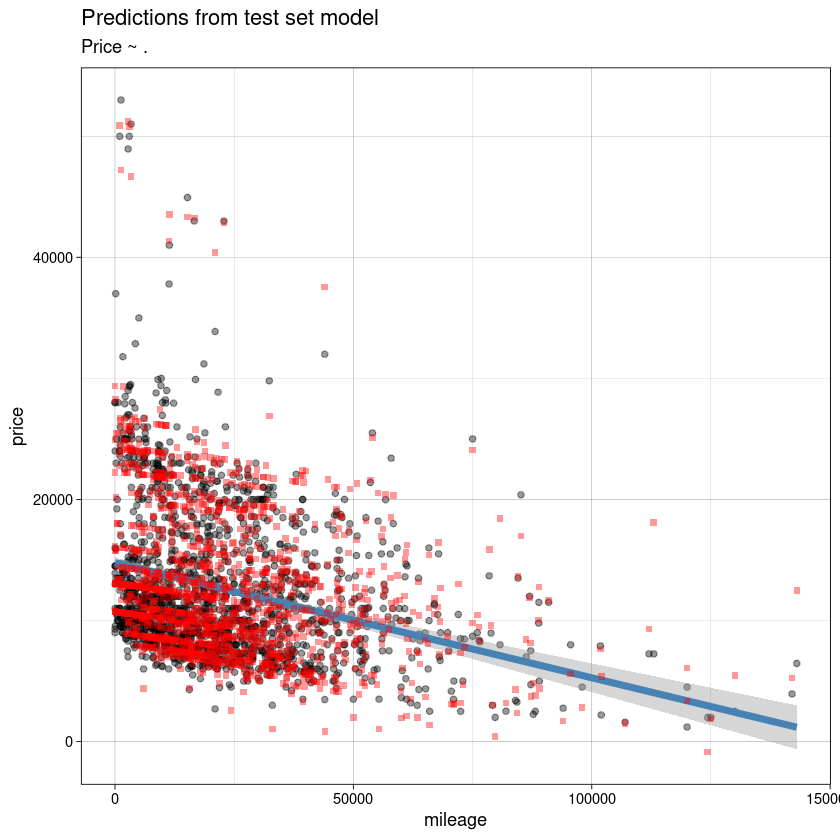

In [59]:
# Create a new linear model using the test data.

# Make predictions on the test data
toyota_test <- test_data %>%
  mutate(predicted = predict(price_model, newdata = test_data),
		resid = price - predicted
		)

# check residuals

toyota_test %>% 
summarize(RMSE = sqrt(mean(resid^2, na.rm = TRUE)),
		  RMS_relative_error = sqrt(mean((resid/price)^2, na.rm = TRUE))
		 )

toyota_test %>% 
summarize(Std_dev = sd(price))

# plot

toyota_test %>% 
ggplot(aes(mileage, price)) + 
geom_point(alpha = 0.4) +
geom_smooth(color = "steelblue",
		   linewidth = 2,
			method = "lm"
		   ) +
geom_point(aes(mileage, predicted),
		  color = "red",
		  shape = 15,
		  alpha = 0.4
		  ) + 
labs(title = "Predictions from test set model",
	subtitle = "Price ~ ."
	) +
theme_linedraw()